In [75]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import mpmath as mp
import random

In [76]:
G = nx.Graph()

In [77]:
# read edge list from the given csv file and get the actual network
G = nx.read_edgelist('/Users/jiyuxiang/Documents/AMSC808N/Final/data/lasftm_asia/lastfm_asia_edges.csv', delimiter=',', nodetype=str)

In [78]:
print(G)

Graph with 7626 nodes and 27807 edges


In [79]:
# remove the head from the csv file
G.remove_node('node_1')
G.remove_node('node_2')

In [80]:
print(G)

Graph with 7624 nodes and 27806 edges


In [81]:
# Q2: find the size of each component; the answer is we have 1 component and its size is 7624
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[7624]

In [82]:
# indeed, we find this network is connected
print(nx.is_connected(G))

True


In [83]:
# try to visualize the network a little bit
# nx.draw(G)

In [84]:
# Q3: first plot log-log of degree distritution using linear binning
degree_freq = nx.degree_histogram(G)

In [85]:
degree_freq[0:10]

[0, 1754, 1188, 791, 619, 464, 385, 318, 270, 193]

In [86]:
# print(degree_freq)
# print(type(degree_freq))
sum(degree_freq)

7624

In [87]:
degrees = range(len(degree_freq))

In [88]:
deg_pk = [0 for i in range(len(degree_freq))]
for i in range(len(degree_freq)):
    deg_pk[i] = degree_freq[i] / 7624
# print(deg_pk)

log_deg_pk = [0 for i in range(len(degree_freq))]
for i in range(len(degree_freq)):
    log_deg_pk[i] = np.log(deg_pk[i])
# print(log_deg_pk) 

/var/folders/sw/zpwl70q93hg5mkz5rgqlxb8w0000gn/T/ipykernel_16509/1272929343.py:8: RuntimeWarning: divide by zero encountered in log
  log_deg_pk[i] = np.log(deg_pk[i])


Text(0, 0.5, 'p_k')

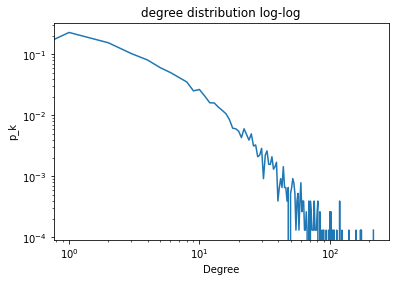

In [89]:
# make the log-log plot using linear binning
plt.loglog(degrees, deg_pk)
plt.title('degree distribution log-log')
plt.xlabel('Degree')
plt.ylabel('p_k')

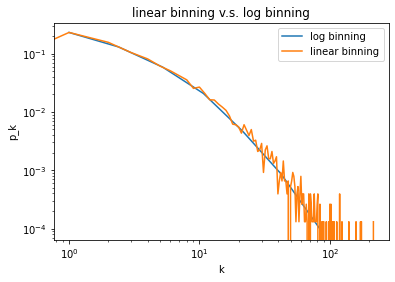

In [90]:
# make the log-log plot using log binning
x_data = [0 for i in range(7)]
y_data = [0 for i in range(7)]
for i in range(7):
    x_num = 0
    for k in range(2 ** i, 2 ** (i+1)):
        x_num += k * deg_pk[k]
    x_data[i] = x_num / sum(deg_pk[(2 ** i): (2 ** (i+1))])     
    y_data[i] = sum(deg_pk[(2 ** i): (2 ** (i+1))]) / (2 ** i)
# print(y_data)
plt.loglog(x_data, y_data, label='log binning') 
plt.loglog(degrees, deg_pk, label='linear binning')
plt.title('linear binning v.s. log binning') 
plt.xlabel('k')
plt.ylabel('p_k')
plt.legend() 

In [91]:
# Q4: solve a LLS problem to find C, alpha and tau in the power-low distribution
A = [[1, -1 * x_data[i], -1 * np.log(x_data[i])] for i in range(len(x_data))]
B = np.log(np.array(y_data))

In [92]:
X = np.linalg.lstsq(A, B, rcond=None)
print(X)

(array([-1.19330265,  0.04436932,  0.99574361]), array([0.25896736]), 3, array([98.48712822,  3.58376718,  1.09877714]))


In [93]:
C = np.exp(X[0][0])
alpha, tau = X[0][1], X[0][2]

In [94]:
print(C, alpha, tau)

0.3032181846342327 0.04436932104183158 0.9957436073482384


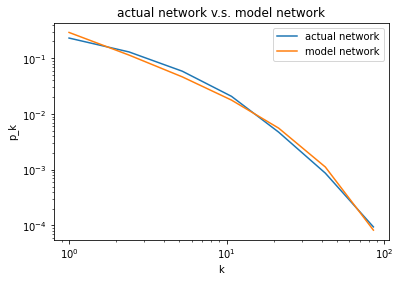

In [95]:
# visualize the degree distribution of the actual network and the random graph model
thm_y_data = [C * np.exp(-1 * alpha * x_data[i]) * (x_data[i] ** (-1 * tau)) for i in range(len(x_data))]
plt.loglog(x_data, y_data, label='actual network') 
plt.loglog(x_data, thm_y_data, label='model network')
plt.title('actual network v.s. model network') 
plt.xlabel('k')
plt.ylabel('p_k')
plt.legend() 

In [96]:
# Q5: find average shortest-path length
print(nx.average_shortest_path_length(G))

5.232237268915701


In [97]:
# calculate average shortest-path length for the model
a = np.exp(-1 * alpha)
lnum = np.log(7624) + np.log(float(mp.polylog(1, a)) / float(mp.polylog(0, a)))
lden = np.log(float(mp.polylog(-1, a)) / float(mp.polylog(0, a)) - 1)
ell = (lnum / lden) + 1
print(ell)

3.2598178440721517


In [107]:
# Q6: clustering coefficient
# first calculate number of connected triplets
ans = []
t = 0
for node in G.nodes():
    ans.append(len(nx.descendants_at_distance(G, node, 2)))
# for node in G.nodes():
#     path_lengths = nx.single_source_dijkstra_path_length(G, node)
#     # print(path_lengths)
#     ans.append(len([node for node, length in path_lengths.items()
#                     if length == 2]))
#     print(len(ans))              
# print(ans)                

In [108]:
sum(ans)

725864

In [109]:
tri = nx.triangles(G)
sum(tri.values())

121299

In [110]:
121299 / 725864

0.1671098167149769

In [25]:
bk = float(mp.polylog(0, a)) / float(mp.polylog(1, a))
bk2 = bk + (float(mp.polylog(-1, a)) - float(mp.polylog(0, a))) / float(mp.polylog(1, a))
cc = 1 / 7624 * ((bk2 - bk) ** 2) / (bk ** 3)
print(cc)

0.009070295082795478


In [26]:
print(bk, bk2)

7.025698890803184 161.8846990782468


In [61]:
# test if the mean degree bk approximates well for the actual network
test = nx.degree_histogram(G)

In [62]:
ttt = 0
for i in range(len(test)):
    ttt += i * test[i]
ttt / 7624    

7.2943336831059815

In [29]:
# Q8: first make a copy of G for problem 8 and 9
G_89 = nx.read_edgelist('/Users/jiyuxiang/Documents/AMSC808N/Final/data/lasftm_asia/lastfm_asia_edges.csv', delimiter=',', nodetype=str)
G_89.remove_node('node_1')
G_89.remove_node('node_2')

Text(0, 0.5, 'fraction of nodes in gc')

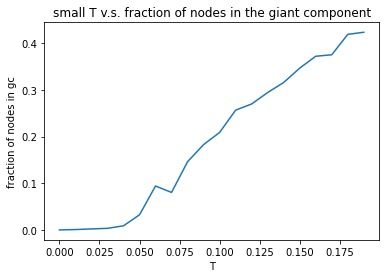

In [30]:
y_frac = [0 for i in range(20)]
for i in range(20):
    T_val = i * 0.01

    G_tmp = nx.read_edgelist('/Users/jiyuxiang/Documents/AMSC808N/Final/data/lasftm_asia/lastfm_asia_edges.csv', delimiter=',', nodetype=str)
    G_tmp.remove_node('node_1')
    G_tmp.remove_node('node_2')

    remove = [edge for edge in list(G_tmp.edges()) if random.uniform(0, 1) < (1 - T_val)]
    G_tmp.remove_edges_from(remove)
    # print(G_tmp) 
    G_tmp_cc = [len(c) for c in sorted(nx.connected_components(G_tmp), key=len, reverse=True)]
    y_frac[i] = G_tmp_cc[0] / 7624
plt.plot([0.01 * i for i in range(20)], y_frac)
plt.title('small T v.s. fraction of nodes in the giant component')
plt.xlabel('T')
plt.ylabel('fraction of nodes in gc')


In [31]:
#  Q9: SIR model for the actual network
T_9 = 0.4
remove = [edge for edge in list(G_89.edges()) if random.uniform(0, 1) < (1 - T_9)]
G_89.remove_edges_from(remove)
print(G_89) 
# [len(c) for c in sorted(nx.connected_components(G_89), key=len, reverse=True)]

Graph with 7624 nodes and 11139 edges


0.7036988457502623
0.708420776495278
0.7124868835257083
0.6963536201469045
0.6976652675760755
0.7078961175236097
0.6959601259181531
0.7111752360965372
0.7124868835257083
0.7030430220356768


Text(0.5, 1.0, 'SIR model on the actual network')

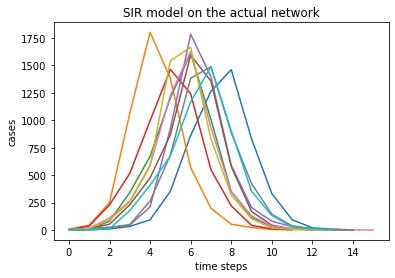

In [58]:
rep = 0
while rep < 10:
    G_tmp = nx.read_edgelist('/Users/jiyuxiang/Documents/AMSC808N/Final/data/lasftm_asia/lastfm_asia_edges.csv', delimiter=',', nodetype=str)
    G_tmp.remove_node('node_1')
    G_tmp.remove_node('node_2')
    remove = [edge for edge in list(G_tmp.edges()) if random.uniform(0, 1) < 0.6]
    G_tmp.remove_edges_from(remove)
    # print(G_tmp) 

    ver_tmp = str(random.randint(0, 7620))
    if G_tmp.degree(ver_tmp):
        rep += 1
        i = 1
        y_infec = []
        while nx.descendants_at_distance(G_tmp, ver_tmp, i):
            y_infec.append(len(nx.descendants_at_distance(G_tmp, ver_tmp, i)))
            # print(y_infec)
            i += 1
        # print(y_infec)
        plt.plot(range(len(y_infec)), y_infec)
        print(sum(y_infec) / 7624)
plt.ylabel('cases')
plt.xlabel('time steps')
plt.title('SIR model on the actual network')                

In [ ]:
# list(nx.bfs_edges(G_89, '18'))

In [63]:
# Q10
bk / (bk2 - bk)

0.045368360135989355

In [64]:
1 - (bk / (bk2 - bk)) / 0.4

0.8865790996600266

In [65]:
alpha

0.04436932104183158

In [66]:
np.exp(-1*alpha)

0.9566005994957725

In [67]:
a

0.9566005994957725

In [69]:
sol = np.roots([-1*0.4*a, 1-0.6*a, a-1])

In [70]:
u = sol[1]

In [71]:
u

0.1134209003399734

In [72]:
S = 1 - np.log(1 - (0.4*u + 0.6) * a) / np.log(1 - a)

In [73]:
S

0.693794951819003